In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [94]:
data = "Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.xlsx"
df = pd.read_excel(data)
# See first 5 rows
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Shape: (4711, 85)
Columns: ['Derivation cohort', 'LOS_Y', 'LOS', 'Death', 'Age', 'Severity', 'Black', 'White', 'Asian', 'Latino', 'MI', 'PVD', 'CHF', 'CVD', 'DEMENT', 'COPD', 'DM Complicated', 'DM Simple', 'Renal Disease', 'All CNS', 'Pure CNS', 'Stroke', 'Seizure', 'OldSyncope', 'OldOtherNeuro', 'OtherBrnLsn', 'Age.1', 'AgeScore', 'O2SatsYes', 'OsSats', 'O2 Sat < 94', 'TempYes', 'Temp', 'Temp > 38', 'MapYes', 'MAP', 'MAP < 70', 'DDimerYes', 'Ddimer', 'D-Dimer > 3', 'PltsYes', 'Plts', 'PltsScore', 'INRYes', 'INR', 'INR > 1.2', 'BUNYes', 'BUN', 'BUN > 30', 'CrtnYes', 'Creatinine', 'CrtnScore', 'SodimuYes', 'Sodium', 'Sodium < 139 or > 154', 'GlucoseYese', 'Glucose', 'Glucose <60 or > 500', 'ASTYes', 'AST', 'AST > 40', 'ALTYes', 'ALT', 'ALT > 40', 'WBCYes', 'WBC', 'WBC <1.8 or > 4.8', 'LymphoYes', 'Lympho', 'Lymphocytes < 1', 'IL6Yes', 'IL6', 'IL6 > 150', 'FerritinYes', 'Ferritin', 'Ferritin > 300', 'CrctProtYes', 'CrctProtein', 'C-Reactive Prot > 10', 'ProCalCYes', 'Procalcitonin', 'Pro

C:\Users\ishaq\AppData\Roaming\Python\Python312\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [95]:
df.describe()

,Derivation cohort,LOS_Y,LOS,Death,Severity,Black,White,Asian,Latino,MI,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
count,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,...,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000
mean,0.499682,0.927616,7.160263,0.243685,3.586287,0.369985,0.098917,0.025685,0.372108,0.042666,...,0.543621,0.836128,10.314919,0.393335,0.655487,1.585601,0.365952,0.863935,0.051558,0.095521
std,0.500053,0.259150,7.029782,0.429350,2.289303,0.482852,0.298583,0.158209,0.483418,0.202125,...,0.498146,0.370198,11.223356,0.488542,0.475260,6.262625,0.481747,0.342893,0.268160,0.293965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000
50%,0.000000,1.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,6.500000,0.000000,1.000000,0.100000,0.000000,1.000000,0.010000,0.000000
75%,1.000000,1.000000,9.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,16.000000,1.000000,1.000000,0.400000,1.000000,1.000000,0.020000,0.000000
max,1.000000,1.000000,56.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,100.000100,1.000000,1.000000,50.000100,1.000000,1.000000,9.560000,1.000000


In [ ]:
#now cleaning and reforming the data 
#2. starting by droping the unnecessary cols
to_drop = ['Derivation cohort', 'LOS_Y', 'LOS']
df = df.drop(columns=to_drop, errors='ignore')
print("After drop - shape:", df.shape)

After drop - shape: (4711, 82)


In [100]:
# 3. Define features 
features = [
    'AgeScore', 'Severity', 'Black', 'White', 'Asian', 'Latino',
    'Troponin', 'Procalcitonin', 'Ferritin', 'Ddimer'
]
# Only keep features that actually exist
features = [f for f in features if f in df.columns]
X = df[features].copy() 


In [101]:
# 4. Check the target 'Death'
print("Death unique values:", df['Death'].unique())
print("Death value counts:")
print(df['Death'].value_counts())

Death unique values: [0 1]
Death value counts:
Death
0    3563
1    1148
Name: count, dtype: int64


In [103]:
# 4b. Convert 'Death' into clean 0/1 integers
y = df['Death'].replace({
    'Alive': 0, 'Dead': 1,
    'No': 0, 'Yes': 1
}).astype(int).values.ravel()
print("y unique values after mapping:", np.unique(y, return_counts=True))


y unique values after mapping: (array([0, 1]), array([3563, 1148], dtype=int64))


In [ ]:
# 5. Handle missing values
X_train = X.fillna(X.median())

# 6. Scale numeric features, if they exist
scaler = StandardScaler()
scale_cols = [c for c in ['Troponin', 'Procalcitonin', 'Ferritin', 'Ddimer'] if c in X.columns]
if scale_cols:
    X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])


In [172]:
# 7. Convert to numpy arrays
X_train = X_train.values
y_train = y
print("X shape:", X.shape, "y shape:", y.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [173]:
print("Class counts:", np.unique(y_train, return_counts=True))


Class counts: (array([0, 1]), array([3563, 1148], dtype=int64))


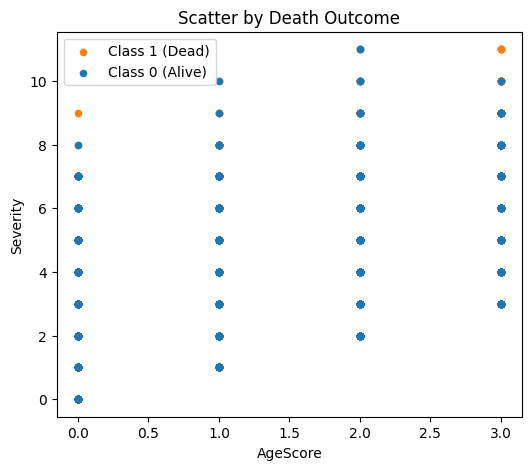

In [174]:
# 8. Plot two features (first two columns)
plt.figure(figsize=(6,5))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color="tab:orange", label="Class 1 (Dead)", s=20)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color="tab:blue", label="Class 0 (Alive)", s=20)
plt.xlabel(features[0] if len(features) > 0 else "Feature 0")
plt.ylabel(features[1] if len(features) > 1 else "Feature 1")
plt.legend()
plt.title("Scatter by Death Outcome")
plt.show()


In [ ]:

print("Unique values in y:", np.unique(y, return_counts=True)) 
# since the plot didn't show any blue dots, just checking to see if there were any surviors 
#as we can see there are more survivors , but we dont see them because the orange dots overlap them 

Unique values in y: (array([0, 1]), array([3563, 1148], dtype=int64))


In [ ]:
# create a sigmoid function 
def sigmoid(z):
    # Clip values so exp() doesn't overflow
    #z = np.clip(z, -500, 500)   # <- ADDED
    #return 1/(1+np.exp(-z))
    return 1/(1+np.exp(-z))

In [ ]:

def cost_func(X,y, w,b):
    m = X.shape[0]
    cost_sum = 0
    for i in range(m):
        z = np.dot(w, X[i])+b
        g = sigmoid(z)
        #epsilon = 1e-15
        cost_sum += -y[i]*np.log(g) - (1-y[i])*np.log(1-g)

    return (1/m)*cost_sum


In [ ]:
def gradient(X,y, w, b):
    n= X.shape[1]
    grad_w = np.zeros(n) #for w to be 0 we would need to equate that to it's vector of 0's
    grad_b = 0
    m = X.shape[0]
    for i in range(m):
        z = np.dot(w, X[i])+b
        g = sigmoid(z)
        grad_b += (g-y[i])
        for j in range(n):
            grad_w[j] += (g-y[i])*X[i,j]
    grad_b = (1/m)*grad_b
    grad_w = (1/m)*grad_w
    return grad_w, grad_b
        

In [ ]:
def gradient_descent(X, y, L, itr):
    n = X.shape[1]
    w = np.zeros(n)
    b = 0
    for i in range(itr):
        grad_w, grad_b = gradient(X, y, w, b)

        w = w - L * grad_w
        b = b - L* grad_b

        if i %1000==0:
            print(f"Iteration {i}: Cost {cost_func(X, y, w, b)}")
    return w, b

In [ ]:
def predict(X,w, b):
    m = X.shape[0]
    preds = np.zeros(m)

    for i in range(m):
        z = np.dot(w, X[i])+b
        g = sigmoid(z)

        if g>=0.5:
            preds[i] = 1
        else:
            preds[i] = 0
    return preds

In [ ]:
L = 0.01
itr = 10000


final_w , final_b = gradient_descent(X_train, y_train, L, itr)

predicitons = predict(X_train, final_w, final_b)
accuracy = np.mean(predicitons == y_train)*100
print(f"Training accuracy: {accuracy:.2f}%")

Iteration 0: Cost 0.6895237108322959
Iteration 1000: Cost 0.5074627590563102
Iteration 2000: Cost 0.47904847290313757
Iteration 3000: Cost 0.46769364338831165
Iteration 4000: Cost 0.46220065583395664
Iteration 5000: Cost 0.4592233121384364
Iteration 6000: Cost 0.457474147311243
Iteration 7000: Cost 0.45638143487373745
Iteration 8000: Cost 0.4556640523547212
Iteration 9000: Cost 0.45517281167674917
Training accuracy: 79.11%


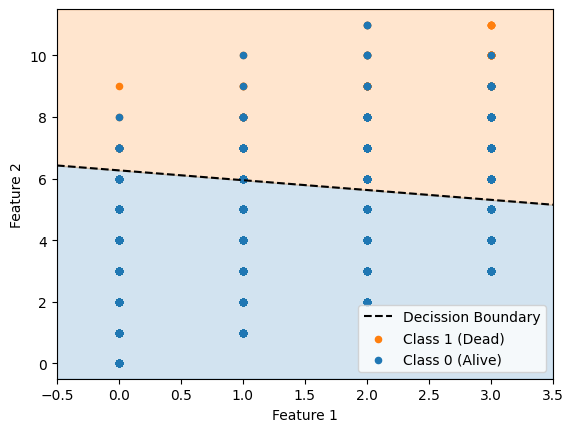

In [175]:
m = -final_w[0]/final_w[1]
c = -final_b/final_w[1]

xmin, xmax = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
ymin, ymax = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xd = np.array([xmin, xmax])
yd = m* xd + c
plt.plot(xd, yd, 'k', ls = '--', label = 'Decission Boundary')
plt.fill_between(xd, yd, ymin, color = 'tab:blue', alpha = 0.2)
plt.fill_between(xd, yd, ymax, color = 'tab:orange', alpha = 0.2)

plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color="tab:orange", label="Class 1 (Dead)", s=20)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color="tab:blue", label="Class 0 (Alive)", s=20)
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()